In [105]:
import tensorflow as tf
from tensorflow import  keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout,BatchNormalization
from keras.layers import Flatten
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import os

In [106]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
     

In [107]:

# Checking if i have GPU Enabled
tf.test.is_gpu_available()

False

In [108]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)

In [118]:

train=training_datagenarator.flow_from_directory(r'C:\Users\Dell\Downloads\archive (14)\Train',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory(r'C:\Users\Dell\Downloads\archive (14)\Train',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation')
     

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


In [119]:


# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [120]:

cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 28, 28, 256)      

In [112]:

checkpoint=tf.keras.callbacks.ModelCheckpoint('C:\\Users\\Dell\\Desktop\\EDUONIX\\assignment\\FireDetection\\model\\FireModel.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=[checkpoint]
     

In [9]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size
                 )
     

C:\Users\Dell\AppData\Local\Temp\ipykernel_13172\2870901126.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train,validation_data=validation,epochs=1,




772/772 [==============================] - 46384s 60s/step - loss: 0.0758 - accuracy: 0.9821 - val_loss: 0.0064 - val_accuracy: 0.9978


In [113]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL
     

In [29]:

# image_for_testing=r'C:\Users\Dell\Desktop\EDUONIX\assignment\FireDetection\TrainingData\0.jpg'
image_for_testing=r'C:\Users\Dell\Downloads\archive (14)\Train\Fire_train\1.png'     

1/1 [==============================] - 0s 219ms/step


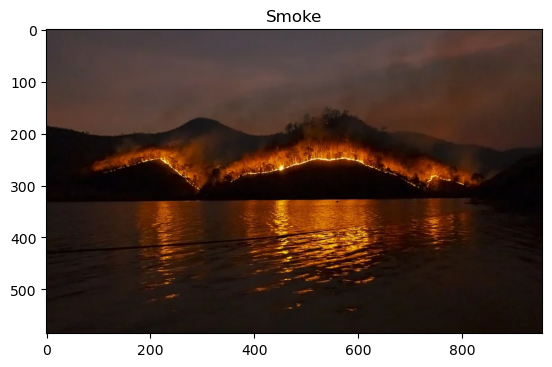

In [30]:

test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
# result=cnn.predict_classes(test_image)
result = (cnn.predict(test_image) >= 0.5).astype("int32")
Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()